#**1. Important Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Binarizer

#**2. Load and Prepare the Dataset**

In [ ]:
data = 'lung_cancer_prediction_dataset.csv'

# 2. Then load the data
import pandas as pd
df = pd.read_csv(data)

In [ ]:
# prompt: check the missing value

# Check for missing values
print(df.isnull().sum())


ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64


#**3. Create and Transform Features python Copy Edit**

In [ ]:
# prompt: convert None in df[Treatment_Type] and df[Cancer_Stage] to do not have

import numpy as np
df['Treatment_Type'] = df['Treatment_Type'].replace(np.nan, 'Do not have')
df['Cancer_Stage'] = df['Cancer_Stage'].replace(np.nan, 'Do not have')


In [ ]:
# prompt: check the missing value

# Check for missing values
print(df.isnull().sum())

ID                             0
Country                        0
Population_Size                0
Age                            0
Gender                         0
Smoker                         0
Years_of_Smoking               0
Cigarettes_per_Day             0
Passive_Smoker                 0
Family_History                 0
Lung_Cancer_Diagnosis          0
Cancer_Stage                   0
Survival_Years                 0
Adenocarcinoma_Type            0
Air_Pollution_Exposure         0
Occupational_Exposure          0
Indoor_Pollution               0
Healthcare_Access              0
Early_Detection                0
Treatment_Type                 0
Developed_or_Developing        0
Annual_Lung_Cancer_Deaths      0
Lung_Cancer_Prevalence_Rate    0
Mortality_Rate                 0
dtype: int64


In [ ]:
# prompt: show me the unique values of Cancer_Stage and Treatment_Type

print(df['Cancer_Stage'].unique())
print(df['Treatment_Type'].unique())
print(df['Healthcare_Access'].unique())


['Do not have' 'Stage 1' 'Stage 2' 'Stage 3' 'Stage 4']
['Do not have' 'Chemotherapy' 'Radiotherapy' 'Surgery']
['Poor' 'Good']


In [ ]:
df["Smoking_Index"] = df["Years_of_Smoking"] * df["Cigarettes_per_Day"]


In [ ]:
# prompt: eliminate df["Years_of_Smoking"] and df["Cigarettes_per_Day"]

# ... (your existing code)

df["Smoking_Index"] = df["Years_of_Smoking"] * df["Cigarettes_per_Day"]

df = df.drop(["Years_of_Smoking", "Cigarettes_per_Day"], axis=1)


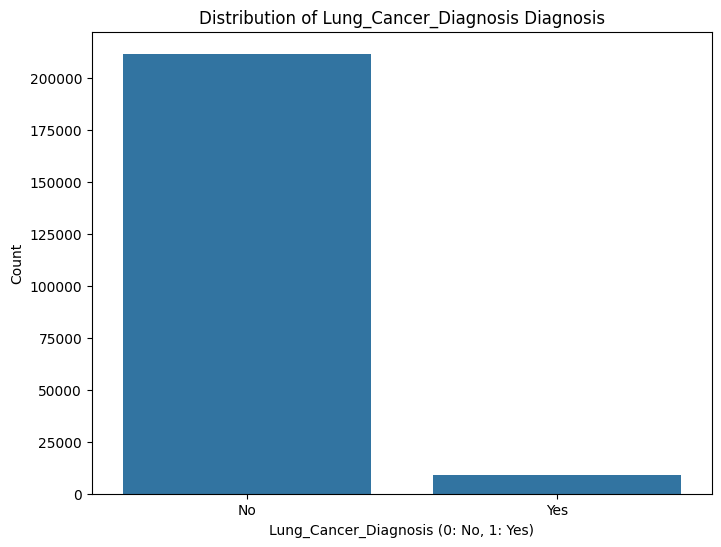

In [ ]:
# prompt: give me just bar plot of df[cancer] respect to the 0 and 1

import matplotlib.pyplot as plt
import seaborn as sns # Make sure seaborn is imported

plt.figure(figsize=(8, 6))
# Pass the DataFrame to the 'data' argument
sns.countplot(x='Lung_Cancer_Diagnosis', data=df)
plt.title('Distribution of Lung_Cancer_Diagnosis Diagnosis')
plt.xlabel('Lung_Cancer_Diagnosis (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


#**6. Assign Random Survival Years to Some Non-Cancer Patients**

In [ ]:
'''num_rows_to_modify = 158
rows_to_modify = no_cancer_sample.sample(n=num_rows_to_modify, random_state=42).index

np.random.seed(42)  # ✅ Ensure consistent random survival years
no_cancer_sample.loc[rows_to_modify, "Survival_Years"] = np.random.randint(1, 20, size=num_rows_to_modify)'''

'num_rows_to_modify = 158\nrows_to_modify = no_cancer_sample.sample(n=num_rows_to_modify, random_state=42).index\n\nnp.random.seed(42)  # ✅ Ensure consistent random survival years\nno_cancer_sample.loc[rows_to_modify, "Survival_Years"] = np.random.randint(1, 20, size=num_rows_to_modify)'

In [ ]:
# prompt: drop ID and Country

import pandas as pd

# Assuming your DataFrame is named 'df'
# Drop the 'ID' and 'Country' columns
df = df.drop(['ID', 'Country'], axis=1)


In [ ]:
# prompt: save data

# Save the DataFrame to a CSV file
df.to_csv('processed_lung_cancer_data.csv', index=False)


In [ ]:
df.head()

,Population_Size,Age,Gender,Smoker,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,...,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Smoking_Index
0,1400,80,Male,Yes,No,No,No,Do not have,0,Yes,...,Yes,No,Poor,No,Do not have,Developing,690000,2.44,0.0,870
1,84,53,Male,No,Yes,No,No,Do not have,0,Yes,...,Yes,No,Poor,No,Do not have,Developing,27000,2.10,0.0,0
2,128,47,Male,Yes,Yes,No,No,Do not have,0,Yes,...,No,No,Poor,Yes,Do not have,Developing,28000,1.11,0.0,72
3,273,39,Female,No,No,Yes,No,Do not have,0,Yes,...,No,No,Poor,No,Do not have,Developing,40000,0.75,0.0,0
4,59,44,Female,No,Yes,No,No,Do not have,0,Yes,...,Yes,No,Poor,No,Do not have,Developing,15000,2.44,0.0,0


In [ ]:
# prompt: label encoder these features (Gender, Smoker, Passive_Smoker, Family_History, Adenocarcinoma_Type, Occupational_Exposure, Indoor_Pollution, Healthcare_Access, Developed_or_Developing, Early_Detection)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Features to label encode
features_to_encode = ['Gender', 'Smoker', 'Passive_Smoker', 'Family_History',
                      'Adenocarcinoma_Type', 'Occupational_Exposure',
                      'Indoor_Pollution', 'Healthcare_Access',
                      'Developed_or_Developing', 'Early_Detection','Lung_Cancer_Diagnosis','Treatment_Type']

for feature in features_to_encode:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le # Store the encoder for later use if needed


In [ ]:
# Create an OrdinalEncoder object with the desired categories
# Adjusted the categories to match the actual values in the DataFrame
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Do not have', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'],
                                             ['Low', 'Medium', 'High']],
                                 dtype=np.int64)


# Fit and transform the specified columns
df[['Cancer_Stage', 'Air_Pollution_Exposure']] = ordinal_encoder.fit_transform(df[['Cancer_Stage', 'Air_Pollution_Exposure']])

df.head()


,Population_Size,Age,Gender,Smoker,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,...,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Smoking_Index
0,1400,80,1,1,0,0,0,0,0,1,...,1,0,1,0,1,1,690000,2.44,0.0,870
1,84,53,1,0,1,0,0,0,0,1,...,1,0,1,0,1,1,27000,2.10,0.0,0
2,128,47,1,1,1,0,0,0,0,1,...,0,0,1,1,1,1,28000,1.11,0.0,72
3,273,39,0,0,0,1,0,0,0,1,...,0,0,1,0,1,1,40000,0.75,0.0,0
4,59,44,0,0,1,0,0,0,0,1,...,1,0,1,0,1,1,15000,2.44,0.0,0


In [ ]:
# prompt: save data

# The data is already saved in the previous code block:
df.to_csv('processed_lung_cancer_data_new.csv', index=False)


#**5.pre processing**




In [ ]:
'''# prompt: use SMOTENC for balancing the dataset

import pandas as pd
from imblearn.over_sampling import SMOTENC

# Load the preprocessed data
df = pd.read_csv('processed_lung_cancer_data_new.csv')

# Separate features (X) and target variable (y)
X = df.drop('Lung_Cancer_Diagnosis', axis=1)
y = df['Lung_Cancer_Diagnosis']

# Identify categorical features for SMOTENC
categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object' or X[col].nunique() < 10]


# Initialize SMOTENC with categorical feature indices
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Apply SMOTE-NC to balance the dataset
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Lung_Cancer_Diagnosis'] = y_resampled

# Save the balanced dataset
balanced_df.to_csv('balanced_lung_cancer_data.csv', index=False)
'''

"# prompt: use SMOTENC for balancing the dataset\n\nimport pandas as pd\nfrom imblearn.over_sampling import SMOTENC\n\n# Load the preprocessed data\ndf = pd.read_csv('processed_lung_cancer_data_new.csv')\n\n# Separate features (X) and target variable (y)\nX = df.drop('Lung_Cancer_Diagnosis', axis=1)\ny = df['Lung_Cancer_Diagnosis']\n\n# Identify categorical features for SMOTENC\ncategorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object' or X[col].nunique() < 10]\n\n\n# Initialize SMOTENC with categorical feature indices\nsmote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)\n\n# Apply SMOTE-NC to balance the dataset\nX_resampled, y_resampled = smote_nc.fit_resample(X, y)\n\n# Create a new balanced DataFrame\nbalanced_df = pd.DataFrame(X_resampled, columns=X.columns)\nbalanced_df['Lung_Cancer_Diagnosis'] = y_resampled\n\n# Save the balanced dataset\nbalanced_df.to_csv('balanced_lung_cancer_data.csv', index=False)\n"

#**16. Plot the Correlation Heat Map**

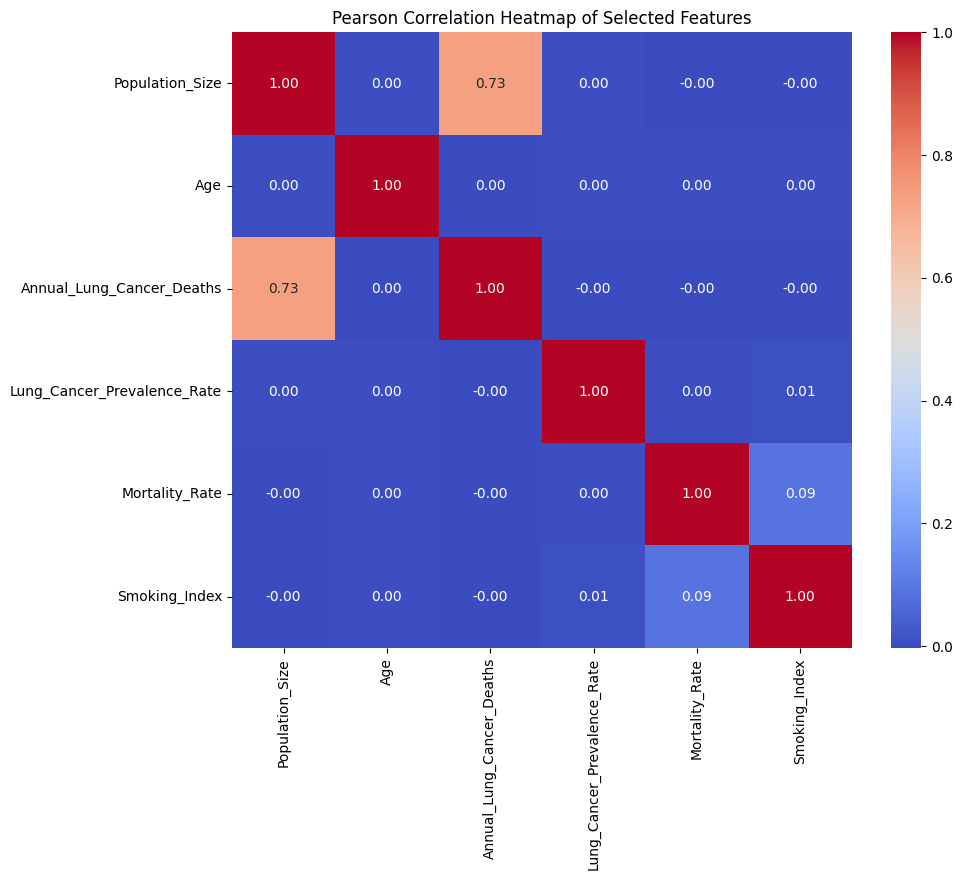

In [ ]:
# prompt: make heatmap with pearson just for these features (Population_Size, Age, Years_of_Smoking, Cigarettes_per_Day,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate, Smoking_Index)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed data
df = pd.read_csv('processed_lung_cancer_data_new.csv')

# Select the specified features for the heatmap
features = ['Population_Size', 'Age',
            'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
            'Mortality_Rate', 'Smoking_Index']

# Calculate the correlation matrix for the selected features
correlation_matrix = df[features].corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Selected Features')
plt.show()


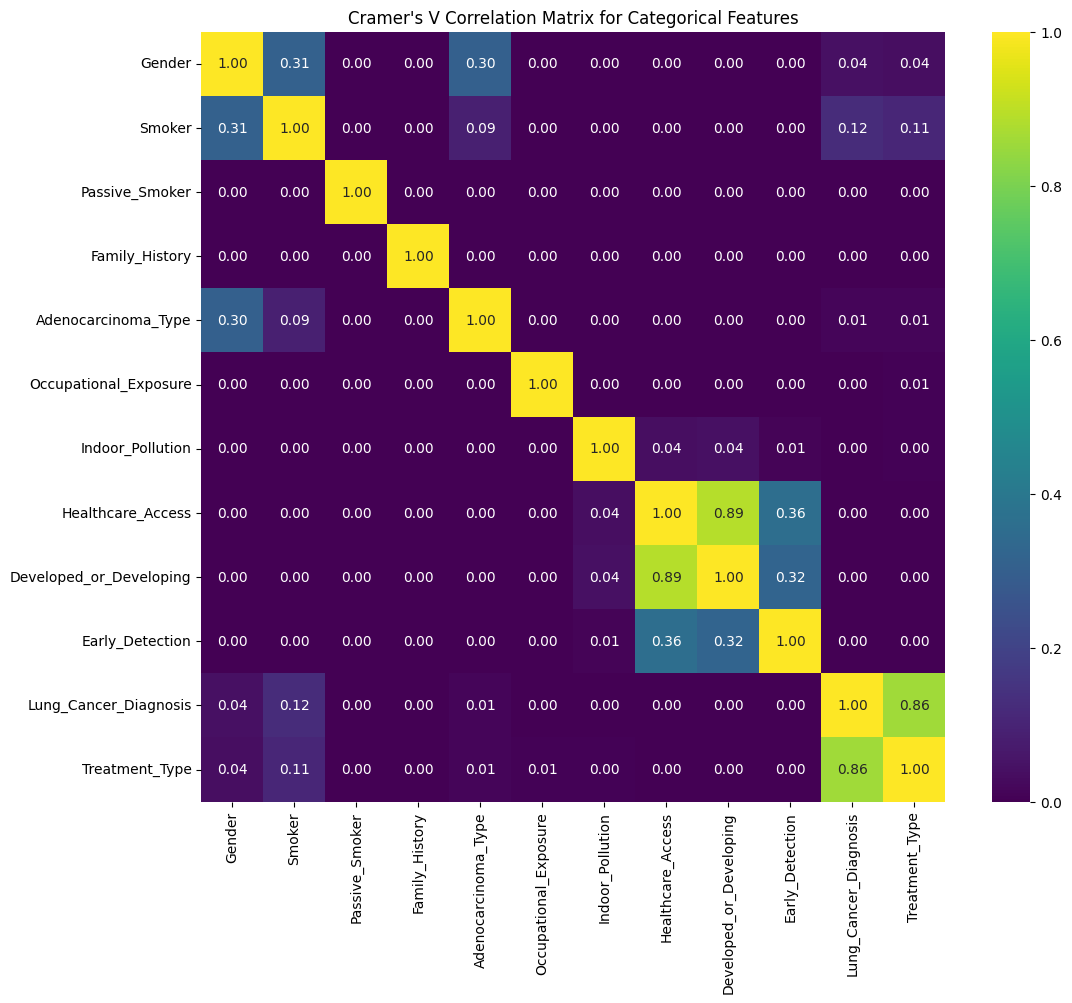

In [ ]:
# prompt: make heat map for categorical variables with Cramer V for these features (['Gender', 'Smoker', 'Passive_Smoker', 'Family_History',
#                       'Adenocarcinoma_Type', 'Occupational_Exposure',
#                       'Indoor_Pollution', 'Healthcare_Access',
#                       'Developed_or_Developing', 'Early_Detection','Lung_Cancer_Diagnosis','Treatment_Type'])

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Load the preprocessed data
df = pd.read_csv('processed_lung_cancer_data_new.csv')

# Select the specified categorical features
categorical_features = ['Gender', 'Smoker', 'Passive_Smoker', 'Family_History',
                      'Adenocarcinoma_Type', 'Occupational_Exposure',
                      'Indoor_Pollution', 'Healthcare_Access',
                      'Developed_or_Developing', 'Early_Detection','Lung_Cancer_Diagnosis','Treatment_Type']

# Calculate Cramer's V for all pairs of categorical features
cramers_v_matrix = np.zeros((len(categorical_features), len(categorical_features)))
for i in range(len(categorical_features)):
    for j in range(len(categorical_features)):
        cramers_v_matrix[i, j] = cramers_v(df[categorical_features[i]], df[categorical_features[j]])

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', fmt=".2f",
            xticklabels=categorical_features, yticklabels=categorical_features)
plt.title("Cramer's V Correlation Matrix for Categorical Features")
plt.show()


In [ ]:
# prompt: drop developed or developing feature

# Assuming your DataFrame is named 'df'
# Drop the 'Developed_or_Developing' column
df = df.drop(['Developed_or_Developing'], axis=1)


In [ ]:
# prompt: apply standardization only on  features = ['Population_Size', 'Age',
#             'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
#             'Mortality_Rate', 'Smoking_Index']

# Assuming 'df' is your DataFrame and features are defined as in your code
features = ['Population_Size', 'Age',
            'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
            'Mortality_Rate', 'Smoking_Index']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df[features] = scaler.fit_transform(df[features])


In [ ]:
df.head()

,Population_Size,Age,Gender,Smoker,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Smoking_Index
0,3.350698,1.440476,1,1,0,0,0,0,0,1,0,1,0,1,0,1,4.790494,1.622573,-0.204354,2.979084
1,-0.417412,0.025246,1,0,1,0,0,0,0,1,0,1,0,1,0,1,-0.282586,1.034380,-0.204354,-0.586960
2,-0.291427,-0.289250,1,1,1,0,0,0,0,1,1,0,0,1,1,1,-0.274934,-0.678299,-0.204354,-0.291839
3,0.123752,-0.708577,0,0,0,1,0,0,0,1,0,0,0,1,0,1,-0.183114,-1.301092,-0.204354,-0.586960
4,-0.488995,-0.446497,0,0,1,0,0,0,0,1,1,1,0,1,0,1,-0.374406,1.622573,-0.204354,-0.586960


In [ ]:
# prompt: split my dataset

# Split the data into training and testing sets
X = df.drop('Lung_Cancer_Diagnosis', axis=1)
y = df['Lung_Cancer_Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# STEP 3: Train Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# STEP 4: Make predictions
y_pred = model.predict(X_test)

# STEP 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42292
           1       1.00      1.00      1.00      1835

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127



In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# STEP 1: Split features and target
X = df.drop('Lung_Cancer_Diagnosis', axis=1)
y = df['Lung_Cancer_Diagnosis']

# STEP 2: Define classifier and hyperparameter grid
nb = GaussianNB()

# Note: GaussianNB has only one tunable parameter: var_smoothing
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# STEP 3: Set up GridSearchCV with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=nb,
                           param_grid={'var_smoothing': param_grid['var_smoothing']},
                           cv=cv,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# STEP 4: Fit the model
grid_search.fit(X, y)

# STEP 5: Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Optional: final evaluation on full data (for reporting only)
y_pred = grid_search.predict(X)
print("\nClassification Report:")
print(classification_report(y, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'var_smoothing': 1e-09}
Best cross-validated accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    211671
           1       1.00      1.00      1.00      8961

    accuracy                           1.00    220632
   macro avg       1.00      1.00      1.00    220632
weighted avg       1.00      1.00      1.00    220632



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# STEP 3: Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=50
                           )  # You can tweak max_iter if necessary
model.fit(X_train, y_train)

# STEP 4: Make predictions
y_pred = model.predict(X_test)

# STEP 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42292
           1       1.00      1.00      1.00      1835

    accuracy                           1.00     44127
   macro avg       1.00      1.00      1.00     44127
weighted avg       1.00      1.00      1.00     44127

